<a href="https://colab.research.google.com/github/peeyushsinghal/EVA/blob/main/S9-Assignment/EVA_S9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**cloning the models git hub **

In [1]:
!pip install -U albumentations

     |████████████████████████████████| 102 kB 5.3 MB/s 
     |████████████████████████████████| 47.6 MB 125 kB/s 
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [34]:
!git clone https://github.com/peeyushsinghal/common-pytorch-models.git

Cloning into 'common-pytorch-models'...
remote: Enumerating objects: 110, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 110 (delta 47), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (110/110), 35.72 KiB | 2.23 MiB/s, done.
Resolving deltas: 100% (47/47), done.


In [35]:
import os
os.getcwd() 
os.chdir('common-pytorch-models')

#### Setting Device and Seed

In [4]:
# loading helper functions
from utils.helper import seed_all, get_device, get_mean_std_dev

In [5]:
# check for default device

device = get_device()
print (f' device Status : {device}')
device

 device Status : cuda


device(type='cuda')

In [6]:
## setting seed for reproducibility
SEED = 42 # arbit seed, why 42 - because in hitch hikers guide to galaxy it is answer to everything
seed_all(SEED)

### Loading data

In [7]:
# Getting Mean and Standard Deviation of CIFAR 10 dataset
mean, std_dev = get_mean_std_dev("CIFAR10")
print(f"Mean : {mean}   STD: {std_dev}") #Mean : [0.491 0.482 0.446]   STD: [0.247 0.243 0.261]

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to ./
Mean : (0.4913996786152028, 0.4821584083946074, 0.4465309144454644)   STD: (0.24703223246328238, 0.2434851280000556, 0.26158784172796423)


### Applying Transformations

In [8]:
from utils.transforms import apply_transforms_custom_resnet # custom transformations for custom resnet

train_transforms, test_transforms = apply_transforms_custom_resnet(mean,std_dev)

### Train and Test data

In [9]:
from torchvision import datasets

trainset = datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=train_transforms)

testset = datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=test_transforms)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


 **Labels**

In [10]:
labels = trainset.classes
labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

 **Train and Test set Dataloader**

In [11]:
import torch
batch_size = 512 # as required 

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)


testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

#### Visualizing Images


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

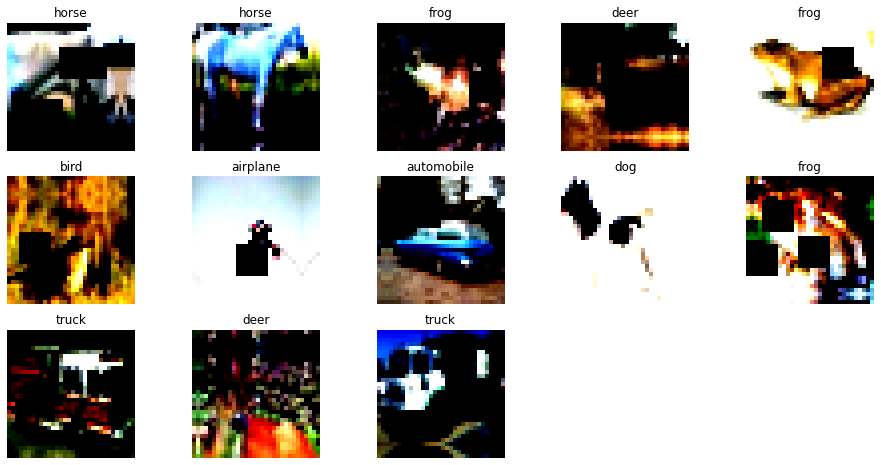

In [12]:
from utils.plot_utils import show_batch
show_batch(trainloader,labels,num_images=13) # for visualizing images

### 2. Network
Loading Model, understanding model params by checking summary

In [13]:
from models.custom_resnet import custom_resnet # Model
from utils.helper import model_summary # shows summary 

model = custom_resnet("BN").to(device) # creating model
model_summary(model, (3, 32, 32)) # shows model summary

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
           Conv2d-10          [-1, 128, 16, 16]         147,456
      BatchNorm2d-11          [-1, 128, 16, 16]             256
       BasicBlock-12          [-1, 128, 16, 16]               0
           Conv2d-13          [-1, 256, 16, 16]         294,912
        MaxPool2d-14            [-1, 25

### 3. Training and Testing

*   includes test and train functions
*   includes loop function, where test can happen after each epoch is trained

In [24]:
import torch.optim as optim # for optimizer
import torch.nn as nn # for network, criterion
import torch.nn.functional as F 


criterion = nn.CrossEntropyLoss()

epochs = 24
# epochs = 1
lr = 0.001


optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# optimizer = optim.Adam(model.parameters(), lr=lr)

# scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min',\
#                                                  factor=0.1, patience=10, threshold=0.0001, threshold_mode='abs')

### 3.1 One Cycle Rate Finder

  0%|          | 0/98 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


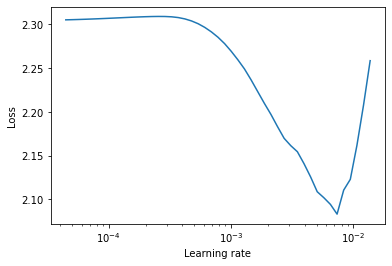

In [17]:
from utils.lrfinder import LRFinder
lr_finder = LRFinder(model,optimizer,criterion,device=device)
lr_finder.range_test(trainloader, testloader, start_lr=1e-5, end_lr=2, num_iter=len(trainloader), step_mode="exp")
lr_finder.plot()
lr_finder.reset()

In [23]:
best_loss = lr_finder.best_loss
LRMAX  = lr_finder.history["lr"][lr_finder.history["loss"].index(best_loss)]
LRMIN = LRMAX / 10
print("Best Loss: %s\n Max Learning Rate: %s \n Min Learning Rate: %s" % (best_loss,LRMAX,LRMIN))

Best Loss: 2.0832062729678444
 Max Learning Rate: 0.00736009752647928 
 Min Learning Rate: 0.000736009752647928


In [31]:
scheduler = optim.lr_scheduler.OneCycleLR(optimizer, LRMAX,  epochs=epochs, steps_per_epoch=len(trainloader), pct_start=5/24, div_factor=10.0, final_div_factor=10.0, three_phase=False, last_epoch=- 1, verbose=False)

In [36]:
from main import trainer, train, test # including wrapper function of train and test
# train_accuracy, train_losses, test_accuracy, test_losses = trainer(model,device, trainloader, testloader, optimizer,epochs,criterion,scheduler)
train_accuracy, train_losses, test_accuracy, test_losses = trainer(model,device, trainloader, testloader, optimizer,epochs,criterion,scheduler)

EPOCH: 1


  0%|          | 0/98 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)
Loss=1.2934144735336304 Batch_id=97 Accuracy=42.64: 100%|██████████| 98/98 [01:53<00:00,  1.16s/it]



Test set: Average loss: 0.0001, Accuracy: 5482/10000 (54.82%)



### 4. Checking results
visualizing train_accuracy, train_losses, test_accuracy, test_losses

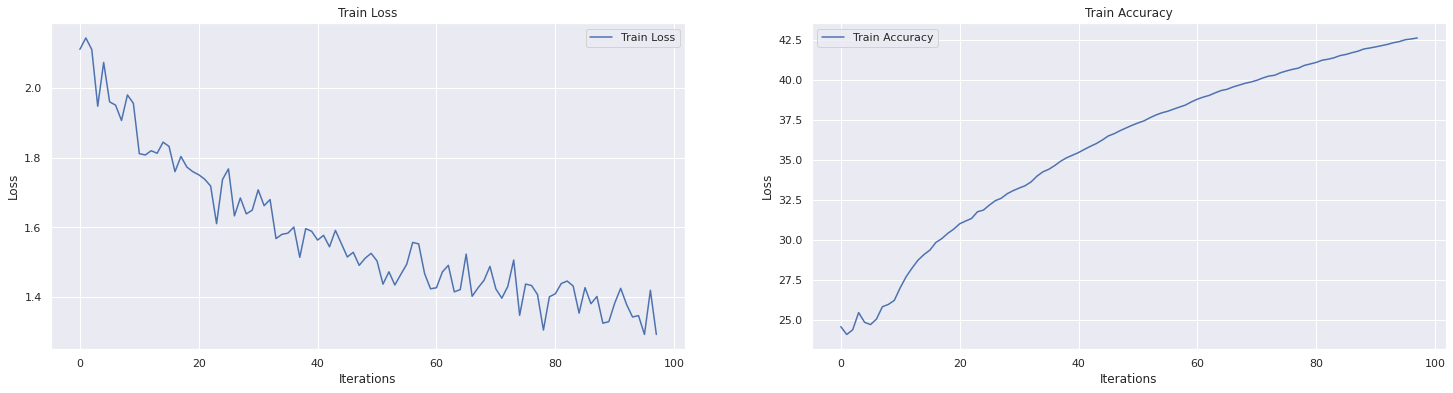

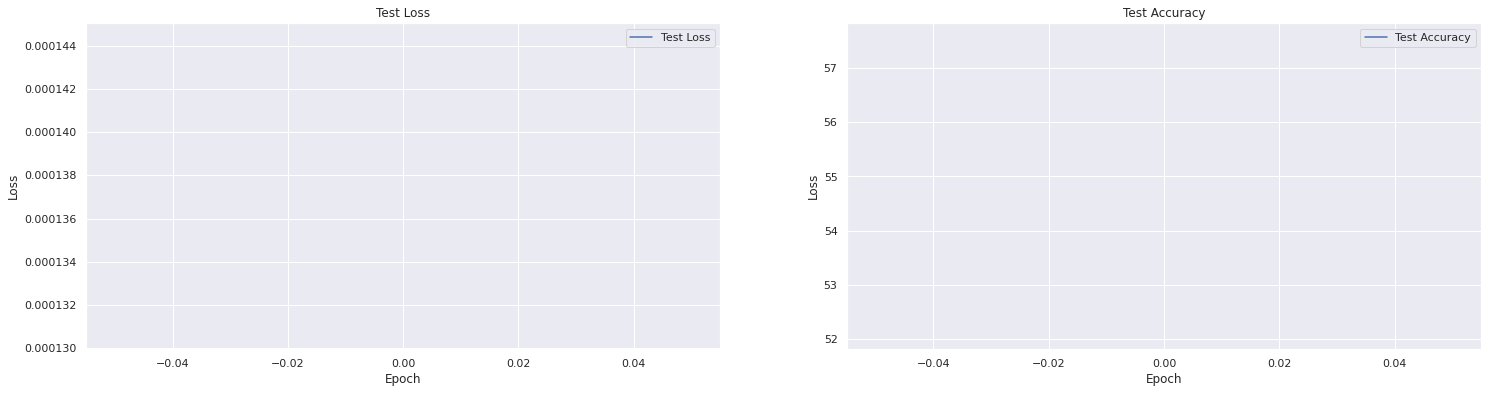

In [37]:
from utils.plot_utils import plot_metrics

plot_metrics(train_accuracy, train_losses, test_accuracy, test_losses)

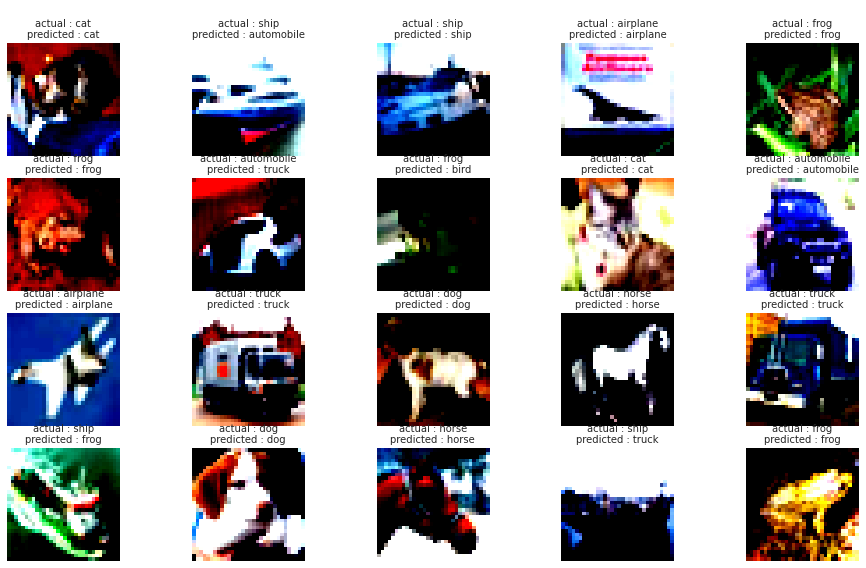

In [38]:
from utils.plot_utils import show_predicted_actual

show_predicted_actual(model, device, testloader, labels,num_images=20)

### Misclassified images

Total wrong predictions are 4518


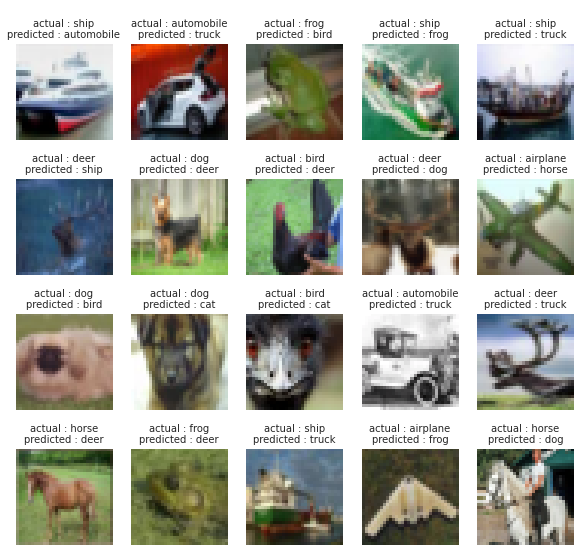

In [39]:
from utils.plot_utils import misclassified_images

images_misclassified = misclassified_images(model, testloader, device, mean, std_dev)

*Class Level Accuarcy*

In [40]:
## Checking class level accuracy
from utils.helper import evaluate_classwise_accuracy
evaluate_classwise_accuracy(model, device, labels, testloader)


Accuracy of airplane : 85 %
Accuracy of automobile : 66 %
Accuracy of  bird : 57 %
Accuracy of   cat : 25 %
Accuracy of  deer : 28 %
Accuracy of   dog : 83 %
Accuracy of  frog : 54 %
Accuracy of horse : 33 %
Accuracy of  ship : 58 %
Accuracy of truck : 83 %


### Grad Cam output for 20 misclassified images

first top 10 images are shown
then next 10 images are shown

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:1025: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


Generating Grad-CAM for conv_layer_1
Generating Grad-CAM for conv_layer_2


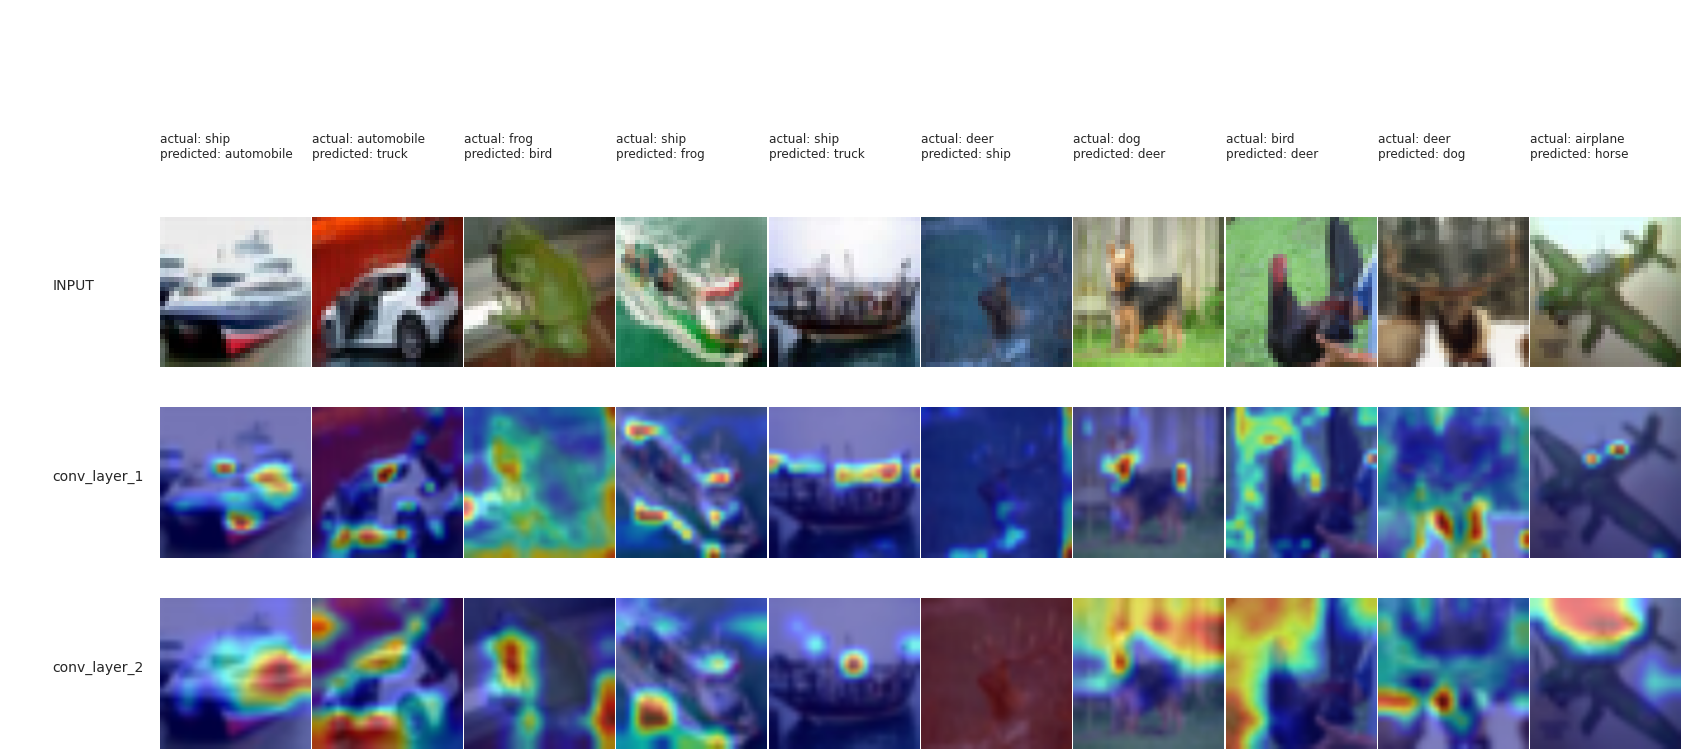

In [41]:
from utils.grad_cam import generate_gradcam, plot_gradcam

target_layers = ["conv_layer_1", "conv_layer_2"]
gradcam_output, probs, predicted_classes = generate_gradcam(images_misclassified[:10], model, target_layers, device)
plot_gradcam(gradcam_output, target_layers, labels, (3, 32, 32), predicted_classes, images_misclassified[:10])

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:1025: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


Generating Grad-CAM for conv_layer_1
Generating Grad-CAM for conv_layer_2


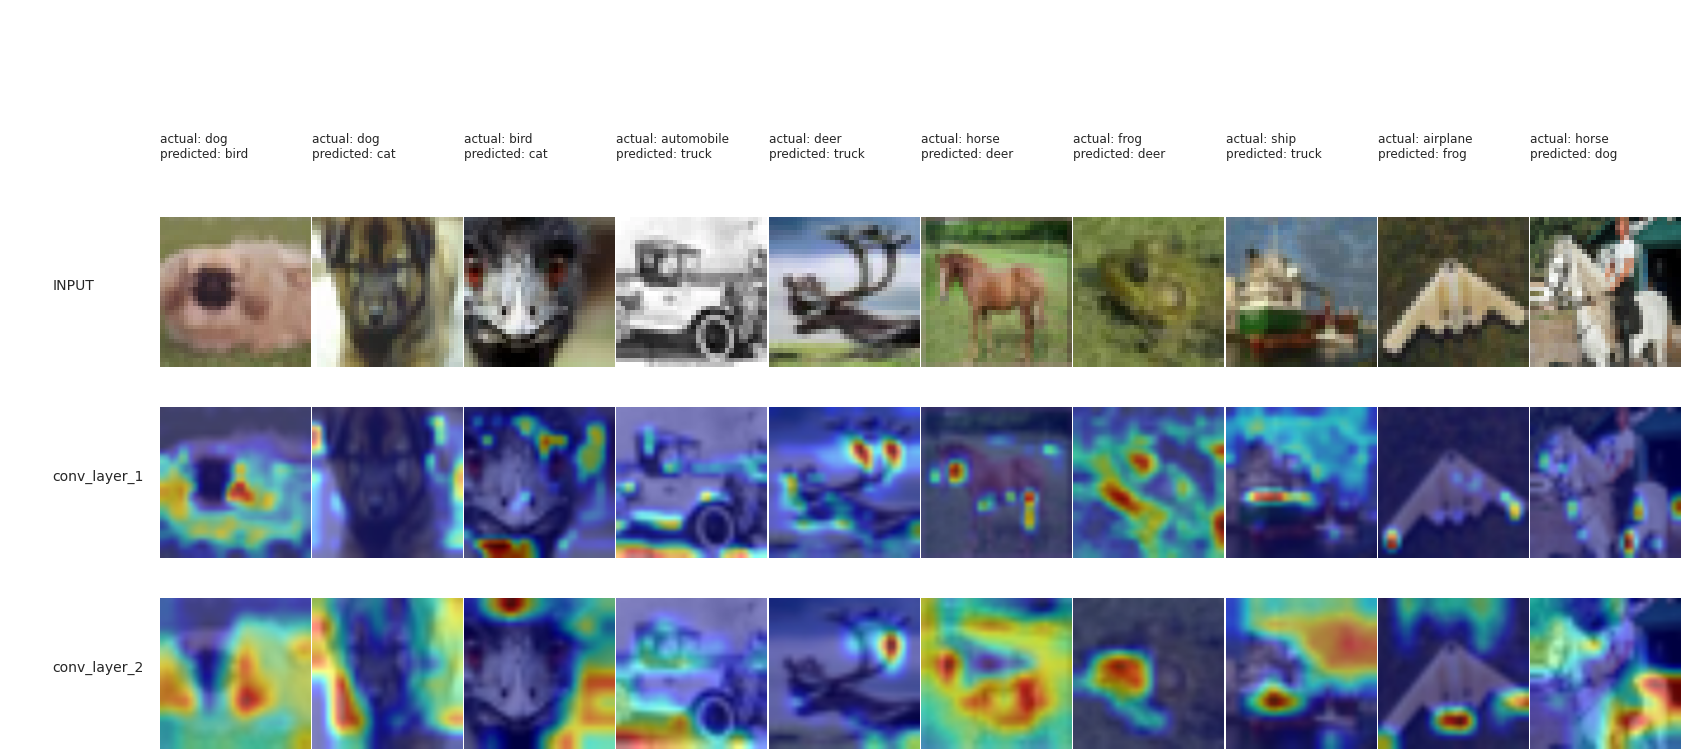

In [42]:
from utils.grad_cam import generate_gradcam, plot_gradcam

target_layers = ["conv_layer_1", "conv_layer_2"]
gradcam_output, probs, predicted_classes = generate_gradcam(images_misclassified[10:20], model, target_layers, device)
plot_gradcam(gradcam_output, target_layers, labels, (3, 32, 32), predicted_classes, images_misclassified[10:20])